In [1]:
!where python

C:\Users\daani\Anaconda3\python.exe
C:\Users\daani\AppData\Local\Microsoft\WindowsApps\python.exe


In [2]:
%load_ext autoreload
%autoreload 2

In [9]:
#Standard imports
import os
import sys
sys.path.append('..')

#Third-party imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

#Local imports
from src.localpaths import RAW_DATA_PATH, X_TEST_RAW_PATH, Y_TEST_RAW_PATH
from src.data.make_dataset import load_training_data
from src.data.make_dataset import load_test_data

In [4]:
pd.set_option('display.max_columns', 100)

# Load Featurized Data

In [6]:
X_train, y_train = load_training_data(final=True)

In [11]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,1,1,0,1,25.30,25.30,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0,0,0,7,1,1,75.15,525.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,0,0,1,4,1,1,20.05,85.50,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,0,29,1,1,76.00,2215.25,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,0,0,0,3,1,1,75.10,270.70,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Look at feature correlations

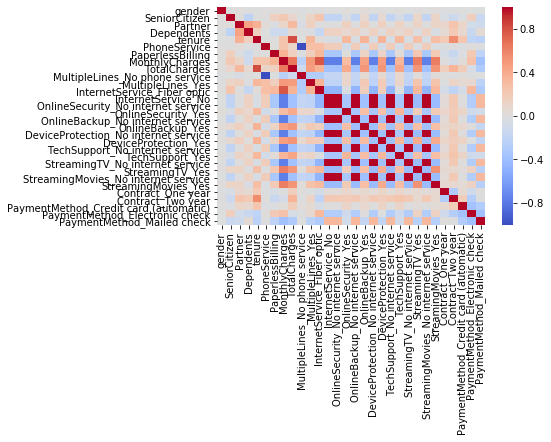

In [15]:
sns.heatmap(X_train.corr(), cmap='coolwarm', center=0, yticklabels=True, xticklabels=True)

In [17]:
correlations=X_train.corr()

In [20]:
correlations = correlations.unstack().reset_index()

In [23]:
correlations.shape

(900, 3)

In [24]:
correlations = correlations[correlations["level_0"] < correlations["level_1"]]

In [31]:
correlations.sort_values(by=0, ascending=False).head(100)

,level_0,level_1,0
463,OnlineBackup_No internet service,OnlineSecurity_No internet service,1.000000
709,StreamingMovies_No internet service,TechSupport_No internet service,1.000000
413,OnlineSecurity_No internet service,StreamingMovies_No internet service,1.000000
411,OnlineSecurity_No internet service,StreamingTV_No internet service,1.000000
409,OnlineSecurity_No internet service,TechSupport_No internet service,1.000000
533,DeviceProtection_No internet service,StreamingMovies_No internet service,1.000000
531,DeviceProtection_No internet service,StreamingTV_No internet service,1.000000
529,DeviceProtection_No internet service,TechSupport_No internet service,1.000000
525,DeviceProtection_No internet service,OnlineBackup_No internet service,1.000000
523,DeviceProtection_No internet service,OnlineSecurity_No internet service,1.000000


In [33]:
sorted(correlations.values, key=lambda x: abs(x[2]), reverse=True)

[array(['MultipleLines_No phone service', 'PhoneService', -1.0],
       dtype=object),
 array(['InternetService_No', 'OnlineSecurity_No internet service', 1.0],
       dtype=object),
 array(['InternetService_No', 'OnlineBackup_No internet service', 1.0],
       dtype=object),
 array(['InternetService_No', 'TechSupport_No internet service', 1.0],
       dtype=object),
 array(['InternetService_No', 'StreamingTV_No internet service', 1.0],
       dtype=object),
 array(['InternetService_No', 'StreamingMovies_No internet service', 1.0],
       dtype=object),
 array(['OnlineSecurity_No internet service',
        'TechSupport_No internet service', 1.0], dtype=object),
 array(['OnlineSecurity_No internet service',
        'StreamingTV_No internet service', 1.0], dtype=object),
 array(['OnlineSecurity_No internet service',
        'StreamingMovies_No internet service', 1.0], dtype=object),
 array(['OnlineBackup_No internet service',
        'OnlineSecurity_No internet service', 1.0], dtype=obje

# Look at feature correlations with churn

In [43]:
X_train.assign(**y_train).corr()[['Churn']].sort_values(by='Churn', ascending=False)

,Churn
Churn,1.000000
InternetService_Fiber optic,0.300112
PaymentMethod_Electronic check,0.294180
PaperlessBilling,0.188793
MonthlyCharges,0.186615
SeniorCitizen,0.146549
StreamingMovies_Yes,0.060152
StreamingTV_Yes,0.054414
MultipleLines_Yes,0.033019
gender,0.011997
